In [207]:
from pymongo import MongoClient
import matplotlib.pyplot as plt
import pandas as pd

client = MongoClient('localhost', 27017)
db = client.hotels
reviews_collection= db.tripadvisor_reviews
#users_collection= db.tripadvisor_users

In [208]:
#df = pd.DataFrame(list(reviews_collection.find()))
#print(df.head())
#df = pd.DataFrame(list(users_collection.find()))

### Number of reviews for each hotel from TripAdvisor

In [209]:
def review_count_for_each_hotel():
    reviews = reviews_collection.aggregate(
    [
        { 
            "$group" : {
                "_id" : "$Hotel_name", 
                "count" : {
                    "$sum" : 1.0
                }
            }
        },
        {
            "$sort" : {
                "count" : -1
            }
        }
    ], 
    );
    return reviews

In [210]:
df = pd.DataFrame(list(review_count_for_each_hotel()))
print(df)

                           _id   count
0  Crowne Plaza Changi Airport  3060.0
1                   Shangri La  3005.0
2                   Park Hotel  3005.0
3                  Oasia Hotel  3005.0
4                Village Hotel  3005.0
5             Marina Bay Sands  3005.0


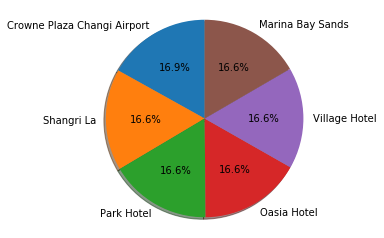

In [211]:
fig1, ax1 = plt.subplots()
ax1.pie(df['count'], labels=df['_id'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

### Number of reviews per month for each Hotel

In [212]:
def review_date_trim():
    reviews_date_trim = reviews_collection.aggregate(
    [ 
        { 
            "$project" : {
                "_id" : "$_id", 
                "Hotel_name": "$Hotel_name",
                "date": {"$split": ["$review_date_list", " "]}
            },
        },
        { "$unwind" : "$date" },
        { 
            "$group" : {
                "_id" : "$date", 
                "count" : {
                    "$sum" : 1.0
                }
            }
        },
        { "$sort" : { "_id" : -1 } }
    ], 
    );
    return reviews_date_trim

In [213]:
df_review_dates = pd.DataFrame(list(review_date_trim()))[0:12].sort_values(['count'], ascending=False)
print(df_review_dates)
#Top 3 months to visit Singapore are July, April and May

          _id   count
6        July  1767.0
11      April  1689.0
3         May  1675.0
10     August  1669.0
4       March  1661.0
5        June  1546.0
7     January  1478.0
9    December  1439.0
2    November  1317.0
1     October  1311.0
8    February  1284.0
0   September  1249.0


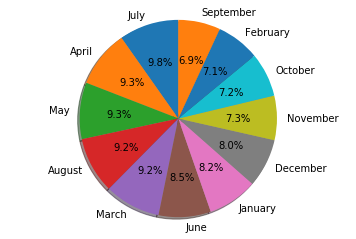

In [214]:
fig2, ax2 = plt.subplots()
ax2.pie(df_review_dates['count'], labels=df_review_dates['_id'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal') 
plt.show()

### Review Mode Counts


In [215]:
def review_mode_counts():
    reviews = reviews_collection.aggregate(
    [
        { 
            "$group" : {
                "_id" : "$review_mode_list", 
                "numModes" : {
                    "$sum" : "1"
                }
            }
        },
    ], 
    );
    return reviews

In [216]:
df = pd.DataFrame(list(review_mode_counts()))
print(df)

          _id  numModes
0  via mobile         0
1          NA         0
